# Practical 7  

**Objective**:
In this practical, you will learn about system stability, observability, controllability, and how to design a state feedback controller using Python's control systems library. You will implement a simple state feedback controller for a given system.  

**Introduction**:
State space representation is a powerful method for analyzing and designing control systems. This practical will guide you through various aspects of state space controller design, including determining system stability, observability, controllability, and implementation of a simple state feedback controller.

**Exercise 1**: Determining System Stability
In this exercise, you will check the stability of a given system by finding its eigenvalues. Eigenvalues are used to determine system stability because they indicate the behavior of the system over time. If all eigenvalues have negative real parts, the system is stable; if any eigenvalue has a positive real part, the system is unstable; if eigenvalues have zero real parts, the system is marginally stable.  
1.1. Import the necessary libraries:

In [1]:
import numpy as np
import control as ctl

1.2. Consider the following state space system:

In [2]:
A = np.asarray([[-1, 0], [0, -2]])
B = np.asarray([[1], [1]])
C = np.asarray([[1, 1]])
D = np.asarray([[0]])

Create the state space system using ctl.ss:

In [3]:
sys = ctl.ss(A, B, C, D)

1.3. Determine the eigenvalues of the A matrix using np.linalg.eigvals:

In [4]:
eigvals = np.linalg.eigvals(A)
print("Eigenvalues:", eigvals)

Eigenvalues: [-1. -2.]


1.4. Analyze the eigenvalues to determine if the system is stable, unstable, or marginally stable. Write down your conclusion.

1.5. Modify the A matrix to create different systems with varying stability properties (e.g., stable, unstable, and marginally stable systems). Repeat steps 1.3 and 1.4 for each system and observe the relationship between eigenvalues and system stability. Write down your observations.

Exercise 2: Observability and Controllability (20 minutes)
In this exercise, you will check if the given system is observable and controllable.

2.1. Calculate the observability matrix using ctl.obsv:

In [5]:
Obsv = ctl.obsv(sys.A, sys.C)
print("Observability matrix:", Obsv)

Observability matrix: [[ 1.  1.]
 [-1. -2.]]


2.2. Determine if the system is observable by checking the rank of the observability matrix using np.linalg.matrix_rank:

In [6]:
observable = np.linalg.matrix_rank(Obsv) == A.shape[0]
print("Observable:", observable)

Observable: True


2.3. Calculate the controllability matrix using ctl.ctrb:

In [7]:
Ctrb = ctl.ctrb(sys.A, sys.B)
print("Controllability matrix:", Ctrb)

Controllability matrix: [[ 1. -1.]
 [ 1. -2.]]


2.4. Determine if the system is controllable by checking the rank of the controllability matrix using np.linalg.matrix_rank:

In [8]:
controllable = np.linalg.matrix_rank(Ctrb) == A.shape[0]
print("Controllable:", controllable)

Controllable: True


2.5. Modify the A, B, or C matrices to create different systems with varying observability and controllability properties. Repeat steps 3.1 to 3.4 for each system and observe the relationship between system parameters and observability/controllability. Write down your observations.

**Exercise 3**: Designing a State Feedback Controller  
In this exercise, you will design a state feedback controller for the given system, assuming it is both observable and controllable. 

In a state feedback controller, the control input (u) is calculated as a linear combination of the system states (x) and a gain matrix (K). The control input is given by:

u = -K * x

The minus sign ensures that the feedback is negative, which is a requirement for stability in control systems. The gain matrix K is designed to place the closed-loop eigenvalues at desired locations, which helps achieve a specified system performance (e.g., faster settling time, reduced overshoot, etc.).

When implementing the state feedback controller, you want to create a closed-loop system, which means the controller's action is combined with the plant dynamics. In the state-space representation, the state update equation for the open-loop system is given by:

x_dot = A * x + B * u

Substituting the control input from the state feedback controller, we get:

x_dot = A * x - B * K * x

Which can be rewritten as:

x_dot = (A - B * K) * x

This is the closed-loop state update equation, and the matrix (A - B * K) represents the closed-loop system's A matrix (A_cl)

3.1. Determine the desired closed-loop eigenvalues for your system. For example, choose two eigenvalues with negative real parts, e.g., -3 and -4.  
3.2. Use ctl.place to find the state feedback gain matrix K that will place the closed-loop eigenvalues at the desired locations:

In [9]:
desired_eigvals = np.array([-3, -4])
K = ctl.place(sys.A, sys.B, desired_eigvals)
print("State feedback gain matrix K:", K)

State feedback gain matrix K: [[ 6. -2.]]


3.3. Implement the state feedback controller by updating the A matrix with the state feedback gain matrix K:

In [10]:
A_cl = sys.A - sys.B.dot(K)
print("Closed-loop A matrix:", A_cl)

Closed-loop A matrix: [[-7.0000000e+00  2.0000000e+00]
 [-6.0000000e+00  8.8817842e-16]]


3.4. Create the closed-loop state space system using the updated A matrix:

In [11]:
sys_cl = ctl.ss(A_cl, sys.B, sys.C, sys.D)

3.5 Simulate the closed-loop system's response to a step input. 

Define a time vector for simulation using np.linspace, e.g., from 0 to 10 seconds with 1000 points:

In [12]:
time = np.linspace(0, 10, 1000)

Calculate the step response of the open and closed-loop system using ctl.step_response:

In [13]:
t1, y1 = ctl.step_response(sys, time)
t2, y2 = ctl.step_response(sys_cl, time)

Plot the step responses of both the open-loop and closed-loop systems using matplotlib:

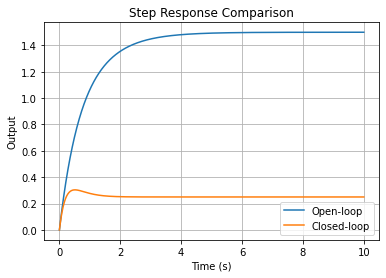

In [14]:
import matplotlib.pyplot as plt

plt.plot(t1, y1, label='Open-loop')
plt.plot(t2, y2, label='Closed-loop')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step Response Comparison')
plt.legend()
plt.grid(True)
plt.show()

3.6 Repeat steps 3.1 to 3.5 with different desired closed-loop eigenvalues. Observe how the choice of eigenvalues affects the step response and system performance (e.g., settling time, overshoot, and steady-state error).  

3.7 Compare the closed-loop system's performance with different desired closed-loop eigenvalues (analyze the step responses). What do you observe about the relationship between the desired eigenvalues and the system's performance? Write down your observations.  